<a href="https://colab.research.google.com/github/JunHyeong-data/python-data-analysis-book-study/blob/main/ch04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 넘파이 기본: 배열과 벡터 연산
- 넘파이는 파이썬에서 산술 계산을 위한 가장 중요한 필수 패키지 중 하나
- 넘파이는 포괄적이고 잘 문서화된 C API를 제공하므로 저수준 언어로 작성된 외부 라이브러이에 데이터를 전달하거나 외부 라이브러리에서 데이터를 넘파이 배열로 파이썬에 전달하기 용이


In [1]:
import numpy as np
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

In [2]:
# 성능 차이를 확인하기 위해 1백만 개의 정수를 저장하는 넘파이 배열과 파이썬 리스트를 비교
import numpy as np

my_arr = np.arange(1_000_000)
my_list = list(range(1_000_000))
%timeit my_arr2 = my_arr * 2
%timeit my_list2 = [x * 2 for x in my_list]
# 넘파이를 사용한 코드가 순수 파이썬으로 작성한 코드보다 열 배에서 백 배 이쌍 빠르고 메모리도 더 적게 사용한다.

1.31 ms ± 91.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
65.9 ms ± 15.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## 다차원 배열 객체 ndarray
- 넘파이의 핵심 기능 ndarray라고 하는 N차원의 배열 객체
- 배열을 사용하면 수학적 연산을 수행할 수 있다.

In [104]:
import numpy as np
data = np.array([[1.5, -0.1, 3], [0, -3, 6.5]])
data

array([[ 1.5, -0.1,  3. ],
       [ 0. , -3. ,  6.5]])

In [105]:
print(data * 10)
print(data + data)

[[ 15.  -1.  30.]
 [  0. -30.  65.]]
[[ 3.  -0.2  6. ]
 [ 0.  -6.  13. ]]


In [106]:
print(data.shape)
data.dtype

(2, 3)


dtype('float64')

### ndarray 생성하기
- 배열을 생성하는 가장 쉬운 방법은 array 함수 사용
- 순차적인 객체를 받아 넘겨받은 데이터가 들어 있는 새로운 넘파이 배열을 생성

In [10]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [11]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [12]:
arr2.ndim
# 차원

2

In [14]:
arr2.shape
# 형태

(2, 4)

In [16]:
print(arr1.dtype)
arr2.dtype

float64


dtype('int64')

In [18]:
print(np.zeros(10))
print(np.zeros((3, 6)))
np.empty((2, 3, 2))
# zeros와 ones는 주어진 길이나 모양에 각각 0과 1이 들어 있는 배열을 생성
# empty 함수는 초기화 되지 않은 배열을 생성

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])

In [19]:
np.arange(15)
# array는 파이썬의 range함수의 배열 버전이다.

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

### ndarray의 자료형
- 자료형(dtype)은 ndarray가 메모리에 있는 특정 데이터를 해석하는 데 필요한 정보를 담고 있는 특수한 객체다.
- ndarray의 astype 메서드를 사용해 배열의 dtype을 다른 형으로 명시적으로 변환가능

In [21]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
print(arr1.dtype)
arr2.dtype

float64


dtype('int32')

In [24]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
print(arr.dtype)
arr.astype(np.int32)

float64


array([ 3, -1, -2,  0, 12, 10], dtype=int32)

In [26]:
numeric_strings = np.array(["1.25", "-9.6", "42"], dtype=np.bytes_)
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

In [27]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [28]:
zeros_uint32 = np.zeros(8, dtype="u4")
zeros_uint32

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=uint32)

### 넘파이 배열의 산술 연산
- 배열은 for 문을 작성하지 않고 데이터를 일괄 처리할 수 있어 매우 중요하다

In [29]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
print(arr)
print(arr * arr)
arr - arr

[[1. 2. 3.]
 [4. 5. 6.]]
[[ 1.  4.  9.]
 [16. 25. 36.]]


array([[0., 0., 0.],
       [0., 0., 0.]])

In [30]:
print(1 / arr)
arr ** 2

[[1.     0.5    0.3333]
 [0.25   0.2    0.1667]]


array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [31]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

### 색인과 슬라이싱 기초

In [35]:
arr = np.arange(10)
print(arr)
print(arr[5])
print(arr[5:8])
arr[5:8] = 12
arr

[0 1 2 3 4 5 6 7 8 9]
5
[5 6 7]


array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [36]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

In [37]:
arr_slice[1] = 12345
arr
# arr_slice의 값을 변경하면 원래 배열인 arr의 값도 바뀌어 있음을 확인할 수 있다.

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [38]:
arr_slice[:] = 64
arr
# 단순히 [:]로 슬라이스하면 배열의 모든 값에 할당된다.

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [39]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

In [41]:
print(arr2d[0][2])
arr2d[0, 2]
# 다음 두 표현은 동일하다

3


np.int64(3)

In [63]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d.shape

(2, 2, 3)

In [43]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [44]:
old_values = arr3d[0].copy()
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [45]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [46]:
arr3d[1, 0]

array([7, 8, 9])

In [48]:
x = arr3d[1]
print(x)
x[0]

[[ 7  8  9]
 [10 11 12]]


array([7, 8, 9])

In [50]:
print(arr)
arr[1:6]

[ 0  1  2  3  4 64 64 64  8  9]


array([ 1,  2,  3,  4, 64])

In [52]:
print(arr2d)
arr2d[:2]

[[1 2 3]
 [4 5 6]
 [7 8 9]]


array([[1, 2, 3],
       [4, 5, 6]])

In [53]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [54]:
lower_dim_slice = arr2d[1, :2]

In [55]:
lower_dim_slice.shape

(2,)

In [56]:
arr2d[:2, 2]

array([3, 6])

In [57]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [59]:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

### 불리언 값으로 선택하기

In [75]:
names = np.array(["Bob", "Joe", "Will", "Bob", "Will", "Joe", "Joe"])
data = np.array([[4, 7], [0, 2], [-5, 6], [0, 0], [1, 2],
                 [-12, -4], [3, 4]])
names
data.shape

(7, 2)

In [76]:
names == "Bob"

array([ True, False, False,  True, False, False, False])

In [77]:
data[names == "Bob"]
# 불리언 배열은 배열의 색인으로 사용할 수 있다.

array([[4, 7],
       [0, 0]])

In [78]:
print(data[names == "Bob", 1:])
data[names == "Bob", 1]

[[7]
 [0]]


array([7, 0])

In [79]:
names != "Bob"
print(~(names == "Bob"))
data[~(names == "Bob")]

[False  True  True False  True  True  True]


array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

In [80]:
cond = names == "Bob"
data[~cond]
# ~연산자는 변수가 참조하는 불리언 배열을 뒤집고 싶을 때 유용하다

array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

In [81]:
mask = (names == "Bob") | (names == "Will")
print(mask)
data[mask]

[ True False  True  True  True False False]


array([[ 4,  7],
       [-5,  6],
       [ 0,  0],
       [ 1,  2]])

In [82]:
print(data)
data[data < 0] = 0
data
# 불리언 배열에 값을 대입하면 오른쪽에 있는 값을 불리언 배열의 값이 True인 위치로 대체하여 작동한다.

[[  4   7]
 [  0   2]
 [ -5   6]
 [  0   0]
 [  1   2]
 [-12  -4]
 [  3   4]]


array([[4, 7],
       [0, 2],
       [0, 6],
       [0, 0],
       [1, 2],
       [0, 0],
       [3, 4]])

In [83]:
data[names != "Joe"] = 7
data

array([[7, 7],
       [0, 2],
       [7, 7],
       [7, 7],
       [7, 7],
       [0, 0],
       [3, 4]])

### 팬시 색인
- 팬시 색인(fancy indexing)은 정수 배열을 사용한 색인을 설명하기 위해 넘파이에서 차용한 단어이다.

In [91]:
arr = np.zeros((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [92]:
arr[[4, 3, 0, 6]]
# 특정한 순서로 행의 하위집합을 선택하고 싶다면 원하는 순서가 명시된 정수가 담긴 ndarray나 리스트를 넘기면 된다

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [93]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [94]:
arr = np.arange(32).reshape((8, 4))
print(arr)
arr[[1, 5, 7, 2], [0, 3, 1, 2]]
# 다차원 색인 배열을 넘기면 조금 다르게 작동
# 결과를 살펴보변 (1,0), (5,3), (7,1), (2,2)에 대응하는 원소가 선택됨
# 배열이 몇 차원이든지 팬시 색인의 결과는 항상 1차원

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]


array([ 4, 23, 29, 10])

In [95]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [96]:
print(arr[[1, 5, 7, 2], [0, 3, 1, 2]])
arr[[1, 5, 7, 2], [0, 3, 1, 2]] = 0
arr

[ 4 23 29 10]


array([[ 0,  1,  2,  3],
       [ 0,  5,  6,  7],
       [ 8,  9,  0, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22,  0],
       [24, 25, 26, 27],
       [28,  0, 30, 31]])

### 배열 전치와 축 바꾸기
- 배열 전치는 데이터를 복사하지 않고 데이터의 모양이 바뀐 뷰를 반환하는 특별한 기능
- ndarray는 transpose 메서드와 T라는 이름의 특수한 속성을 가진다

In [98]:
arr = np.arange(15).reshape((3, 5))
print(arr)
arr.T

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [99]:
arr = np.array([[0, 1, 0], [1, 2, -2], [6, 3, 2], [-1, 0, -1], [1, 0, 1]])
arr
np.dot(arr.T, arr)
# 행렬을 계산할 때 자주 사용하게 될 행렬의 내적은 numpy.dot을 이용해서 구한다.

array([[39, 20, 12],
       [20, 14,  2],
       [12,  2, 10]])

In [101]:
arr.T @ arr
# @ 연산자는 행렬 곱셈을 수행하는 또 다른 방법

array([[39, 20, 12],
       [20, 14,  2],
       [12,  2, 10]])

In [103]:
print(arr)
arr.swapaxes(0, 1)
# swapaxes는 메서드를 통해 두 개의 축 번호를 받아서 배열을 뒤바꾼다

[[ 0  1  0]
 [ 1  2 -2]
 [ 6  3  2]
 [-1  0 -1]
 [ 1  0  1]]


array([[ 0,  1,  6, -1,  1],
       [ 1,  2,  3,  0,  0],
       [ 0, -2,  2, -1,  1]])

## 난수 생성
- numpy.random 모듈은 파이썬 내장 random 모듈을 보강해 다양한 종류의 확률분포로부터 효과적으로 표본값을 생성하는 데 주로 사용한다

In [107]:
samples = np.random.standard_normal(size=(4, 4))
samples
# 표준정규분포로부터 4X4 크기의 표본을 생성할 수 있다.

array([[-0.2047,  0.4789, -0.5194, -0.5557],
       [ 1.9658,  1.3934,  0.0929,  0.2817],
       [ 0.769 ,  1.2464,  1.0072, -1.2962],
       [ 0.275 ,  0.2289,  1.3529,  0.8864]])

In [108]:
from random import normalvariate
N = 1_000_000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.standard_normal(N)
# 파이썬 내장 모듈보다 수십배 이상 빠르다

658 ms ± 10.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
39.9 ms ± 6.96 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [5]:
rng = np.random.default_rng(seed=12345)
data = rng.standard_normal((2, 3))
data

array([[-1.42382504,  1.26372846, -0.87066174],
       [-0.25917323, -0.07534331, -0.74088465]])

In [6]:
type(rng)

numpy.random._generator.Generator

## 유니버설 함수: 배열의 각 원소를 빠르게 처리하는 함수
- ufunc라고도 부르는 유니버설 함수는 ndarray 안의 데이터 원소별로 연산을 수행하는 함수
- 유니버설 함수는 하나 이상의 스칼라 값을 받아서 하나 이상의 스칼라 결괏값을 반환하는 간단한 함수를 빠르게 수행하는 벡터화된 래퍼 함수라고 생각하면 된다.

In [3]:
import numpy as np
arr = np.arange(10)
print(arr)
print(np.sqrt(arr))
np.exp(arr)
# np.sqrt나 np.exp 같은 간단한 변형을 전체 원소에 적용 가능

[0 1 2 3 4 5 6 7 8 9]
[0.         1.         1.41421356 1.73205081 2.         2.23606798
 2.44948974 2.64575131 2.82842712 3.        ]


array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [19]:
x = rng.standard_normal(8)
y = rng.standard_normal(8)
print(x)
print(y)
np.maximum(x, y)
# x와 y의 원소별로 가장 큰 값을 계산

[-0.96482356 -0.5566078  -2.29838764 -0.73208213  0.7364691   0.46571672
 -0.10787605 -0.34143629]
[ 1.58453379  0.28224121  0.90954639  0.39507157 -0.66937652  1.55536898
 -1.23813903 -1.19617346]


array([ 1.58453379,  0.28224121,  0.90954639,  0.39507157,  0.7364691 ,
        1.55536898, -0.10787605, -0.34143629])

In [22]:
arr = rng.standard_normal(7) * 5
print(arr)
remainder, whole_part = np.modf(arr)
print(remainder)
whole_part
# np.modf는 파이썬 내장 함수인 math.modf의 벡터화 버전이며 분수를 받아서 몫과 나머지를 함께 반환한다.

[-4.23119986  0.9831015  -4.49818912 -1.28302714  8.36273883 -1.87634823
 10.1839739 ]
[-0.23119986  0.9831015  -0.49818912 -0.28302714  0.36273883 -0.87634823
  0.1839739 ]


array([-4.,  0., -4., -1.,  8., -1., 10.])

In [25]:
print(arr)
out = np.zeros_like(arr)
np.add(arr, 1)
np.add(arr, 1, out=out)
out

[-4.23119986  0.9831015  -4.49818912 -1.28302714  8.36273883 -1.87634823
 10.1839739 ]


array([-3.23119986,  1.9831015 , -3.49818912, -0.28302714,  9.36273883,
       -0.87634823, 11.1839739 ])

## 배열을 이용한 배열 기반 프로그래밍
- 넘파이 배열을 사용하면 반복문을 작성하지 않고 간결한 배열 연산을 통해 많은 종류의 데이터 처리 작업을 할 수 있다.
- 배열 연산을 사용해 반복문을 명시적으로 제거하는 기법을 벡터화라고 부른다.

In [24]:
points = np.arange(-5, 5, 0.01) # -5부터 4.99까지 0.01씩 증가하는 값의 배열
xs, ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [26]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

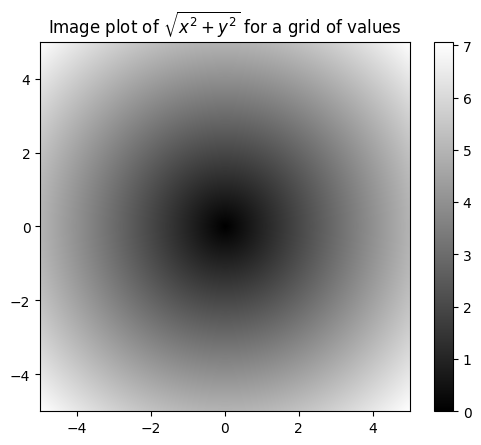

In [27]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray, extent=[-5, 5, -5, 5])
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

In [28]:
plt.draw()

<Figure size 640x480 with 0 Axes>

In [29]:
plt.close("all")

### 배열 연산으로 조건부 표현하기
- numpy.where 함수는 x if 조건 else y 같은 삼항식의 벡터화된 버전이다.

In [33]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [35]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
print(result)
# 이 방법 몇가지 문제
# 첫 번째로는 순수 파이썬으로 수행되기 때문에 큰 배열을 빠르게 처리 못함
# 다차원 배열에서는 사용 못함

[np.float64(1.1), np.float64(2.2), np.float64(1.3), np.float64(1.4), np.float64(2.5)]


In [36]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [38]:
arr = rng.standard_normal((4, 4))
print(arr)
print(arr > 0)
np.where(arr > 0, 2, -2)

[[-0.94400054  0.5314067   0.193346   -1.11826358]
 [ 0.51184558 -2.27056629  0.26316355  2.47131349]
 [-1.0198852   0.01875261 -1.89426422 -0.75500166]
 [ 0.75619774 -1.04246201 -0.03425814 -0.3551683 ]]
[[False  True  True False]
 [ True False  True  True]
 [False  True False False]
 [ True False False False]]


array([[-2,  2,  2, -2],
       [ 2, -2,  2,  2],
       [-2,  2, -2, -2],
       [ 2, -2, -2, -2]])

In [39]:
np.where(arr > 0, 2, arr) # set only positive values to 2

array([[-0.94400054,  2.        ,  2.        , -1.11826358],
       [ 2.        , -2.27056629,  2.        ,  2.        ],
       [-1.0198852 ,  2.        , -1.89426422, -0.75500166],
       [ 2.        , -1.04246201, -0.03425814, -0.3551683 ]])

### 수학 메서드와 통계 메서드
- 배열 전체 혹은 배열의 한 축에 속하는 자료에서 통계를 계산하는 수학 함수는 배열클래스의 메서드로 사용할 수 있다.
- 합이나 평균, 표준편차는 넘파이의 최상위 함수를 이용하거나 배열의 인스턴스 메서드를 사용해서 구한다.

In [41]:
arr = rng.standard_normal((5, 4))
print(arr)
print(arr.mean())
print(np.mean(arr))
print(arr.sum())

[[-0.51348805 -1.01573661 -1.0702709   0.12391266]
 [-0.80301588 -0.63763575  1.14449564 -1.64090191]
 [-1.31400358 -0.51035251 -0.09986088 -0.12950676]
 [-1.39670506  0.19380935 -0.12929273  0.35447909]
 [-1.08287264  0.24493923  0.22082079 -0.66043248]]
-0.43608094868432207
-0.43608094868432207
-8.721618973686441


- axis=0은 "행을 따라 계산해서 열을 남김"
- axis=1은 "열을 따라 계산해서 행을 남김"
- axis=0 → 아래 방향(세로 방향), 행을 따라 연산
- axis=1 → 옆 방향(가로 방향), 열을 따라 연산

In [43]:
print(arr.mean(axis=1))
arr.sum(axis=0)

[-0.61889572 -0.48426448 -0.51343093 -0.24442734 -0.31938627]


array([-5.1100852 , -1.72497628,  0.06589192, -1.95244941])

In [44]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

- np.sum(arr)	그냥 전체 합
- np.cumsum(arr)	앞에서부터 순차적으로 더한 누적합

In [45]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [47]:
print(arr.cumsum(axis=0))
arr.cumsum(axis=1)

[[ 0  1  2]
 [ 3  5  7]
 [ 9 12 15]]


array([[ 0,  1,  3],
       [ 3,  7, 12],
       [ 6, 13, 21]])

### 불리언 배열을 위한 메서드
- 불리언 값은 True 또는 False로 강제된다.
- 불리언 배열에서 sum 메서드를 실행하면 True인 원소의 개수가 반환된다.

In [50]:
arr = rng.standard_normal(100)
print(arr)
print((arr > 0).sum()) # Number of positive values
(arr <= 0).sum() # Number of non-positive values

[ 0.96938323  0.4354152  -0.24712573  0.16818521 -0.31062454  0.0709336
 -0.1033723   0.52532528 -1.88267705 -0.34567801 -0.2913092  -1.13063834
 -0.17272468 -1.05354233 -0.66455314 -0.289682   -0.25317177 -0.57378316
  1.10347462  0.20116509  0.32235142  0.23309276 -0.66806524 -0.88321901
  0.83963969 -0.3530779  -1.77113747 -2.1987871   0.22176018 -0.73707721
 -0.06758385 -0.54725416 -0.40741463 -0.17273762 -1.24740736 -0.01876242
  0.98612359  0.69567427 -1.73962463 -1.34163608 -1.33282638 -0.24806882
  0.85483479  0.32298434 -1.75364283  0.05488553  0.80741159 -0.44901398
  1.90417969 -0.6514683   1.17248231  2.35122688 -1.2764236  -0.32368662
  0.5746962   3.21141765 -1.78846554  0.56605023  0.28479635 -0.42237613
 -0.83485244 -0.52591618 -0.30305367 -1.2698595   1.5754851  -1.1084501
 -0.42751936 -0.66148108 -0.41325393  0.09297793 -0.75759707 -0.23612991
  1.72446043  1.05620035 -0.288029    0.9071776  -0.76849407  0.22593124
 -1.42854248 -1.14411867 -0.86655639  1.23753573  0.2

np.int64(56)

In [51]:
bools = np.array([False, False, True, False])
bools.any()
bools.all()

np.False_

### 정렬

In [53]:
arr = rng.standard_normal(6)
print(arr)
arr.sort()
arr

[-2.42960165  0.93061002  1.6678386  -0.33409003 -0.05151061  1.2432583 ]


array([-2.42960165, -0.33409003, -0.05151061,  0.93061002,  1.2432583 ,
        1.6678386 ])

In [54]:
arr = rng.standard_normal((5, 3))
arr

array([[ 0.36703643, -1.34618662, -1.18188225],
       [-1.04500481, -1.43236727, -0.02008862],
       [-0.53416669,  0.02687545,  0.69273232],
       [ 1.77458224,  0.20214111, -1.88084695],
       [ 1.37878553, -0.13364709,  1.15171173]])

In [56]:
arr.sort(axis=0)
print(arr)
arr.sort(axis=1)
arr

[[-1.88084695 -1.43236727 -1.04500481]
 [-1.34618662 -1.18188225 -0.53416669]
 [-0.13364709 -0.02008862  0.36703643]
 [ 0.02687545  0.69273232  1.37878553]
 [ 0.20214111  1.15171173  1.77458224]]


array([[-1.88084695, -1.43236727, -1.04500481],
       [-1.34618662, -1.18188225, -0.53416669],
       [-0.13364709, -0.02008862,  0.36703643],
       [ 0.02687545,  0.69273232,  1.37878553],
       [ 0.20214111,  1.15171173,  1.77458224]])

In [57]:
arr2 = np.array([5, -10, 7, 1, 0, -3])
sorted_arr2 = np.sort(arr2)
sorted_arr2

array([-10,  -3,   0,   1,   5,   7])

### 집합 관련 함수

In [58]:
names = np.array(["Bob", "Will", "Joe", "Bob", "Will", "Joe", "Joe"])
np.unique(names)
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

In [59]:
sorted(set(names))

[np.str_('Bob'), np.str_('Joe'), np.str_('Will')]

In [60]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

<ipython-input-60-440155b193fa>:2: DeprecationWarning: `in1d` is deprecated. Use `np.isin` instead.
  np.in1d(values, [2, 3, 6])


array([ True, False, False,  True,  True, False,  True])

## 4.5 배열 데이터의 파일 입출력
- 넘파이는 디스크에서 텍스트나 바이너리 형식의 데이터를 불러오거나 저장할 수 있다.

## 4.6 선형대수

In [62]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
print(x)
print(y)
x.dot(y)

[[1. 2. 3.]
 [4. 5. 6.]]
[[ 6. 23.]
 [-1.  7.]
 [ 8.  9.]]


array([[ 28.,  64.],
       [ 67., 181.]])

In [63]:
np.dot(x, y)
# x.dot(y)는 np.dot(x, y)와 동일하다

array([[ 28.,  64.],
       [ 67., 181.]])

In [64]:
x @ np.ones(3)

array([ 6., 15.])

In [65]:
from numpy.linalg import inv, qr
X = rng.standard_normal((5, 5))
mat = X.T @ X
inv(mat)
mat @ inv(mat)

array([[ 1.00000000e+00, -2.22162379e-17, -4.76176301e-17,
         2.24581180e-16,  6.63025213e-17],
       [-2.33433667e-16,  1.00000000e+00,  9.78908326e-17,
        -2.56668851e-16, -6.18266487e-17],
       [ 5.02129888e-16,  6.69092363e-17,  1.00000000e+00,
         1.93720714e-15, -6.49000095e-17],
       [ 1.40231377e-17,  3.45805919e-17, -1.14293615e-16,
         1.00000000e+00,  2.03126494e-17],
       [-4.59798414e-16, -2.72447674e-17,  7.66127751e-17,
         1.91722398e-16,  1.00000000e+00]])

## 계단 오르내리기 예제

In [73]:
import random
position = 0
walk = [position]
nsteps = 1000
for _ in range(nsteps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

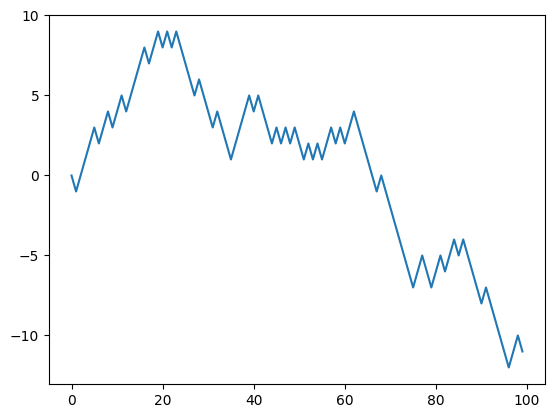

In [75]:
plt.plot(walk[:100])

In [76]:
nsteps = 1000
rng = np.random.default_rng(seed=12345)  # fresh random generator
draws = rng.integers(0, 2, size=nsteps)
steps = np.where(draws == 0, 1, -1)
walk = steps.cumsum()

In [77]:
walk.min()
walk.max()

np.int64(50)

In [78]:
(np.abs(walk) >= 10).argmax()

np.int64(155)

In [79]:
nwalks = 5000
nsteps = 1000
draws = rng.integers(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(axis=1)
walks

array([[  1,   2,   3, ...,  22,  23,  22],
       [  1,   0,  -1, ..., -50, -49, -48],
       [  1,   2,   3, ...,  50,  49,  48],
       ...,
       [ -1,  -2,  -1, ..., -10,  -9, -10],
       [ -1,  -2,  -3, ...,   8,   9,   8],
       [ -1,   0,   1, ...,  -4,  -3,  -2]])

In [80]:
walks.max()
walks.min()

np.int64(-120)

In [81]:
hits30 = (np.abs(walks) >= 30).any(axis=1)
hits30
hits30.sum() # Number that hit 30 or -30

np.int64(3395)

In [82]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(axis=1)
crossing_times

array([201, 491, 283, ..., 219, 259, 541])

In [83]:
crossing_times.mean()

np.float64(500.5699558173785)

In [84]:
draws = 0.25 * rng.standard_normal((nwalks, nsteps))

## 마치며
- 이 책은 데이터를 다루기 위해 판다스를 주로 다루지만 배열 기반의 방식에 대해서 살펴볼 것